# Project Topic: Online Fraud Detection

Objective :
To build a machine learning model to detect online fraud for BB PLC¶

In [1]:
# importing liberies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# LOADING OF FILE 
online_fraud= pd.read_csv(r'Online Fraud Detection.csv')

In [3]:
# CHECKING THE FIRST FIVE ROWS
online_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
# CHECKING THE LAST FIVE ROWS
online_fraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
# TO CHECK THE NUMBER OF ROWS AND COLUMNS IN THE DATASET
online_fraud.shape

(1048575, 10)

In [6]:
# TO CHEECK FOR MISSING VALUE
# from the check its seen that there is no missing value.
online_fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
# TO CHECKFOR DATATYPE,NON -NUL COUNT,NUMBER OF COLUMN AS WELL AS MEMORY USAGE OF THE DATASET
online_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
# 7 and 8 will be converted to float

In [10]:
# Checking correlation
correlation = online_fraud.corr()
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64

In [11]:
# DESCRIPTIVE DATA ANALYSIS ON THE DATASET AND CONVERT THE TYPE FROM STANDARD FORM TO INTEGER
online_fraud.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [12]:
# TO CHECK THE DISTRIBUTION OF DATASET BASED ON TYPE
online_fraud['type'].value_counts().astype(int)

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int32

In [13]:
# TO CHECK THE DISTRIBUTION OF DATASET BASED ON TYPE AND CONVERT TO PERCENTAGE
online_fraud['type'].value_counts(normalize = True)

CASH_OUT    0.356332
PAYMENT     0.337480
CASH_IN     0.216608
TRANSFER    0.082734
DEBIT       0.006845
Name: type, dtype: float64

In [14]:
online_fraud['amount'].value_counts().astype(float)
online_fraud['nameOrig'].value_counts().astype(float)
online_fraud['nameDest'].value_counts().astype(float)

C985934102     98.0
C1286084959    96.0
C1590550415    89.0
C248609774     88.0
C665576141     87.0
               ... 
M382871047      1.0
M322765556      1.0
M1118794441     1.0
M1127250627     1.0
M677577406      1.0
Name: nameDest, Length: 449635, dtype: float64

<AxesSubplot:>

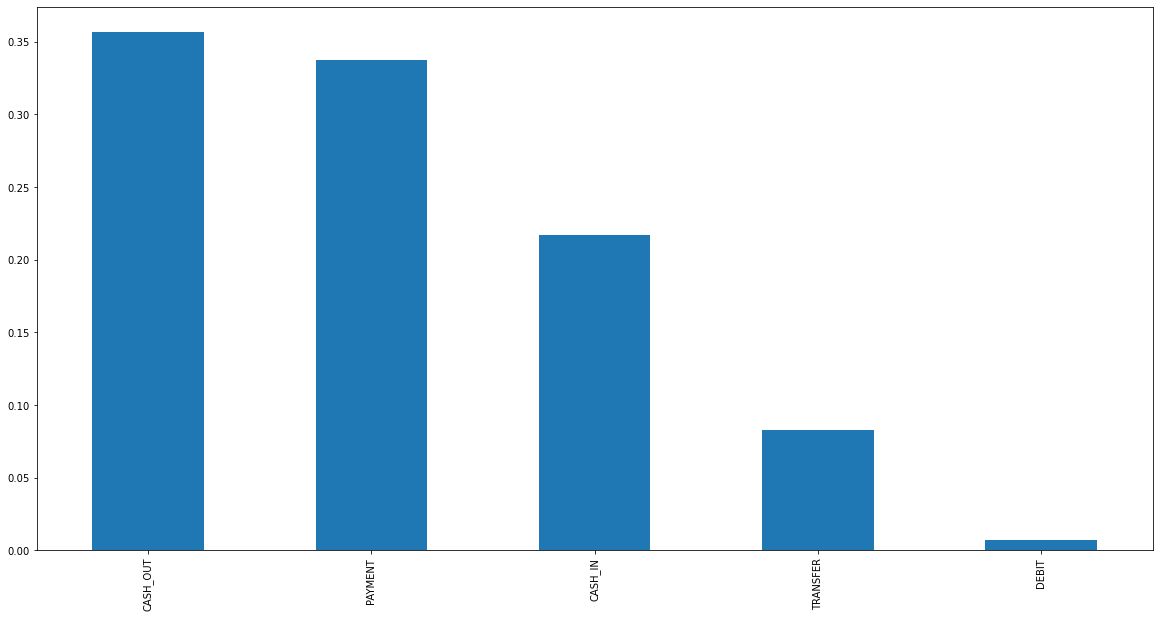

In [15]:
# BAR CHART SHWING THE DISTRIBUTION OF TRANSACTION TYPE 
fraud_pie= online_fraud['type'].value_counts(normalize = True).plot(kind= 'bar',figsize = (20,10))
fraud_pie

<AxesSubplot:xlabel='isFraud', ylabel='count'>

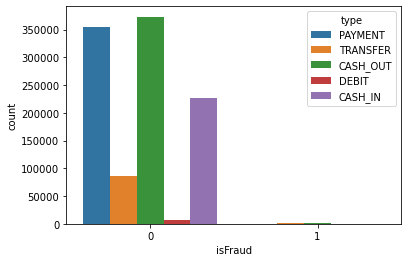

In [16]:
# to check for a type of transaction with fraud
large_to_small = online_fraud.groupby('isFraud').size().sort_values().index[::-1]
sns.countplot(data=online_fraud, x="isFraud", hue="type",order =large_to_small)

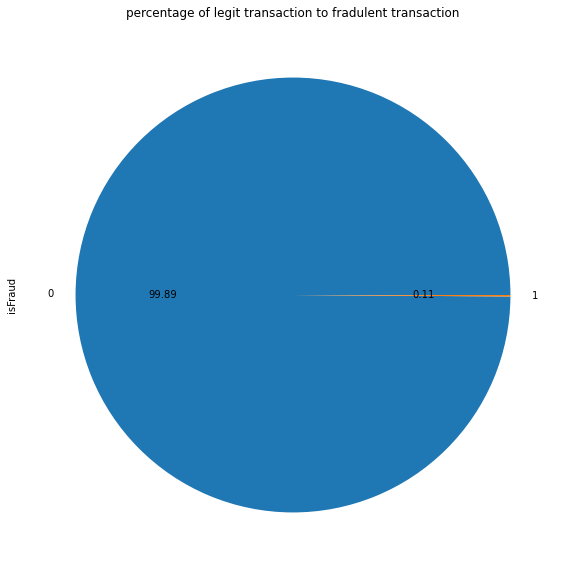

In [17]:
#  A PIE CHART SHOWING FRADULENT TRANSACTIONS TO LEGIT TRANSACTION IN PERCENTAGE
fraud= online_fraud['isFraud'].value_counts().plot(kind = "pie",figsize =(20,10),autopct="%.2f")
plt.title("percentage of legit transaction to fradulent transaction")
fraud
plt.show()

In [18]:
# TO CHECKTHE NUMBER OF LEGIT AND  FRAUDULENT TRANSACTION  
legit_transactions=online_fraud[online_fraud['isFraud']==0]
fraud_transaction= online_fraud[online_fraud['isFraud']==1]

In [19]:
print(legit_transactions.shape)
print(fraud_transaction.shape)

(1047433, 10)
(1142, 10)


In [20]:
# DESCRIPTIVE STATISTICS MEASURE FOR LEGIT TRANSACTION  
legit_transactions.amount.describe().astype(int)

count    1047433
mean      157539
std       254188
min            0
25%        12134
50%        76214
75%       213492
max      6419835
Name: amount, dtype: int32

In [21]:
# DESCRIPTIVE STATISTICS MEASURE FOR FRAUDULENT TRANSACTION 
fraud_transaction.amount.describe().astype(int)

count        1142
mean      1192628
std       2030598
min           119
25%         86070
50%        353179
75%       1248759
max      10000000
Name: amount, dtype: int32

In [22]:
# TO COMPARE THE VALUES OF BOTH TRANSACTION
online_fraud.groupby('isFraud').mean().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26,157539,873633,894746,978732,1114237
1,48,1192628,1218636,33944,452866,1077940


# WE HAVE TO DEAL WITH THE UNEVEN DISTRIBUTION OF DATA USING UNDER SAMPLING:
what we do here is to built a sample dataset conatining similar distribution of legit and fraudulent transaction .
Number of fraud transaction is 1142.
We have to take 1142 transactions of the legit so that the transaction will be evenly distributed


In [23]:
legit_new_transactions=legit_transactions.sample(n=1142)

In [24]:
# concatanant the two data set
final_sample_set = pd.concat([legit_new_transactions,fraud_transaction],axis = 0)

In [25]:
# checking of the first rows of the final sample data
final_sample_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
488376,19,PAYMENT,12425.07,C653507306,381753.55,369328.48,M115947583,0.00,0.00,0
848937,41,CASH_IN,177837.70,C1604476259,20635.00,198472.70,C861638092,173667.65,0.00,0
752471,38,CASH_OUT,243538.24,C1761700787,0.00,0.00,C1322450827,2930875.22,2801037.24,0
877899,42,CASH_OUT,209280.64,C651986913,170768.00,0.00,C2079332573,0.00,209280.64,0
760249,38,CASH_IN,34293.60,C1766839883,598375.95,632669.54,C104327980,2083264.81,2104892.63,0


In [26]:
# checking the last five rows of the final data set
final_sample_set.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [27]:
# TO SHOW EVEN DISTRIBUTION OF FRAUDULENT AND LEGIT TRANSACTION
final_sample_set['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [28]:
# TO COMPARE THE VALUES OF BOTH TRANSACTION FOR THE FINAL SAMPLE DATA
final_sample_set.groupby('isFraud').mean().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,27,150045,915888,937689,1040193,1167356
1,48,1192628,1218636,33944,452866,1077940


# Feature Engineering
In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that your machine learning algorithms can work better with.

First, replace some values to something you can more easily understand

TODO: Encode values in the data set



In [29]:
final_sample_set.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
488376,19,PAYMENT,12425.07,C653507306,381753.55,369328.48,M115947583,0.00,0.00,0
848937,41,CASH_IN,177837.70,C1604476259,20635.00,198472.70,C861638092,173667.65,0.00,0
752471,38,CASH_OUT,243538.24,C1761700787,0.00,0.00,C1322450827,2930875.22,2801037.24,0
877899,42,CASH_OUT,209280.64,C651986913,170768.00,0.00,C2079332573,0.00,209280.64,0
760249,38,CASH_IN,34293.60,C1766839883,598375.95,632669.54,C104327980,2083264.81,2104892.63,0


# one hot encoding

In [30]:
categorical  = ['type']
final_sample_set[categorical]

,type
488376,PAYMENT
848937,CASH_IN
752471,CASH_OUT
877899,CASH_OUT
760249,CASH_IN
...,...
1047888,CASH_OUT
1048221,TRANSFER
1048222,CASH_OUT
1048323,TRANSFER


In [31]:
categorical_dummies = pd.get_dummies(final_sample_set[categorical])
print(categorical_dummies.shape)
categorical_dummies.head()

(2284, 5)


,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
488376,0,0,0,1,0
848937,1,0,0,0,0
752471,0,1,0,0,0
877899,0,1,0,0,0
760249,1,0,0,0,0


In [32]:
categorical_dummies2  = pd.concat([final_sample_set, categorical_dummies], axis=1)
categorical_dummies2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
488376,19,PAYMENT,12425.07,C653507306,381753.55,369328.48,M115947583,0.00,0.00,0,0,0,0,1,0
848937,41,CASH_IN,177837.70,C1604476259,20635.00,198472.70,C861638092,173667.65,0.00,0,1,0,0,0,0
752471,38,CASH_OUT,243538.24,C1761700787,0.00,0.00,C1322450827,2930875.22,2801037.24,0,0,1,0,0,0
877899,42,CASH_OUT,209280.64,C651986913,170768.00,0.00,C2079332573,0.00,209280.64,0,0,1,0,0,0
760249,38,CASH_IN,34293.60,C1766839883,598375.95,632669.54,C104327980,2083264.81,2104892.63,0,1,0,0,0,0


In [33]:

categorical_left = categorical_dummies2.drop(categorical,axis=1)

categorical_left

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
488376,19,12425.07,C653507306,381753.55,369328.48,M115947583,0.00,0.00,0,0,0,0,1,0
848937,41,177837.70,C1604476259,20635.00,198472.70,C861638092,173667.65,0.00,0,1,0,0,0,0
752471,38,243538.24,C1761700787,0.00,0.00,C1322450827,2930875.22,2801037.24,0,0,1,0,0,0
877899,42,209280.64,C651986913,170768.00,0.00,C2079332573,0.00,209280.64,0,0,1,0,0,0
760249,38,34293.60,C1766839883,598375.95,632669.54,C104327980,2083264.81,2104892.63,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1,0,1,0,0,0
1048221,95,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1,0,0,0,0,1
1048222,95,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1,0,1,0,0,0
1048323,95,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1,0,0,0,0,1


In [34]:
# split data into features and target
X= categorical_left.drop(['isFraud','nameOrig','nameDest'],axis =1)
y=categorical_left['isFraud']

In [35]:
X.head()

print(X.shape)

(2284, 11)


In [36]:
# print(X)
y.head()

488376    0
848937    0
752471    0
877899    0
760249    0
Name: isFraud, dtype: int64

In [37]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
# split the data into training and test data 
#split into training and validation sets using a 40% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [39]:
print(("X_train: ",X_train.shape), ("X_valid: ",X_valid.shape),
     ("y_train: ",y_train.shape), ("y_valid: ",y_valid.shape))

('X_train: ', (1598, 11)) ('X_valid: ', (686, 11)) ('y_train: ', (1598,)) ('y_valid: ', (686,))


In [40]:
print(X_train.head(2),
      
#       x_valid.head(2),
      
#       y_train.head(2),
      
      y_valid.head(2))

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030751    90   134515.36      134515.36             0.0             0.0   
992140     45  1069508.42     1069508.42             0.0             0.0   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030751             0.0             0              0           0   
992140              0.0             0              0           0   

         type_PAYMENT  type_TRANSFER  
1030751             0              1  
992140              0              1   717792     1
1030335    1
Name: isFraud, dtype: int64


In [41]:
# logistic regression
LR = LogisticRegression()

# k neighbors
KN = KNeighborsClassifier()

# decision tree
DC = DecisionTreeClassifier()

# random forest
RF = RandomForestClassifier()

In [42]:
#create list of your model names
models = [LR,KN,DC,RF]

In [43]:
## Train and Test the models
#  create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    # fit your model
    model.fit(X_train,y_train)
    # predict on the fitted model
    prediction = model.predict(X_valid)
    # print evaluation metric
    print("""
    For {}, Accuracy score is {}
    """.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid)) #use this later

In [44]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


    For LogisticRegression, Accuracy score is 0.9373177842565598
    
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       323
           1       0.97      0.91      0.94       363

    accuracy                           0.94       686
   macro avg       0.94      0.94      0.94       686
weighted avg       0.94      0.94      0.94       686


    For KNeighborsClassifier, Accuracy score is 0.8935860058309038
    
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       347
           1       0.89      0.90      0.89       339

    accuracy                           0.89       686
   macro avg       0.89      0.89      0.89       686
weighted avg       0.89      0.89      0.89       686


    For DecisionTreeClassifier, Accuracy score is 0.9650145772594753
    
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       338
           1      

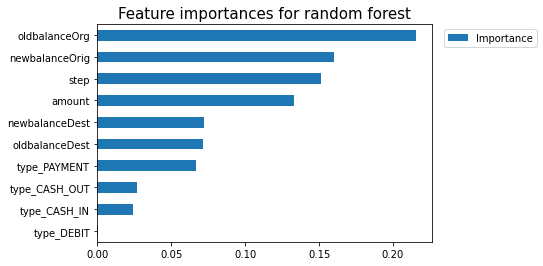

In [45]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=["Importance"])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by="Importance").plot.barh()

plt.title("Feature importances for random forest", fontsize= 15) #specification for Plot Title
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [46]:
#get these top 10 importances
RF_importances[:10].sort_values(by="Importance").index.values

array(['type_DEBIT', 'type_CASH_IN', 'type_CASH_OUT', 'type_PAYMENT',
       'oldbalanceDest', 'newbalanceDest', 'amount', 'step',
       'newbalanceOrig', 'oldbalanceOrg'], dtype=object)

# A Bit of Feature Selection

In [47]:
#create a new x train with only 10 features
X_train2 = X_train[['type_DEBIT', 'type_CASH_IN', 'type_CASH_OUT', 'type_PAYMENT',
       'oldbalanceDest', 'newbalanceDest', 'amount', 'newbalanceOrig',
       'step', 'oldbalanceOrg']]
X_train2.head()

,type_DEBIT,type_CASH_IN,type_CASH_OUT,type_PAYMENT,oldbalanceDest,newbalanceDest,amount,newbalanceOrig,step,oldbalanceOrg
1030751,0,0,0,0,0.00,0.00,134515.36,0.00,90,134515.36
992140,0,0,0,0,0.00,0.00,1069508.42,0.00,45,1069508.42
136420,0,0,1,0,112512.48,114612.48,2100.00,0.00,11,2100.00
810495,0,0,1,0,10600000.00,11100000.00,432117.11,0.00,40,0.00
952520,0,1,0,0,217196.44,105520.03,111676.41,136650.41,44,24974.00


In [48]:
X_valid2 = X_valid[['type_DEBIT', 'type_CASH_IN', 'type_CASH_OUT', 'type_PAYMENT',
       'oldbalanceDest', 'newbalanceDest', 'amount', 'newbalanceOrig',
       'step', 'oldbalanceOrg']]
X_valid2.head()

,type_DEBIT,type_CASH_IN,type_CASH_OUT,type_PAYMENT,oldbalanceDest,newbalanceDest,amount,newbalanceOrig,step,oldbalanceOrg
717792,0,0,0,0,0.0,0.0,180967.56,0.00,37,180967.56
1030335,0,0,0,0,0.0,0.0,246938.77,0.00,58,246938.77
117281,0,0,0,1,0.0,0.0,16349.72,0.00,11,12448.00
6702,0,0,0,0,0.0,0.0,17320.91,0.00,6,17320.91
766887,0,0,0,1,0.0,0.0,24562.44,6719.56,39,31282.00


In [49]:
print(X_valid2.shape)

print(X_train2.shape)


(686, 10)
(1598, 10)


In [50]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train2,y_train,X_valid2,y_valid):
    #fit your model
    model.fit(X_train2,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid2)
    #print evaluation metric
    print("\nFor {}, Accuracy score is {} \n".format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    #print(classification_report(prediction,y_valid)) #use this later

In [51]:
# LOOP THROUUGH EACH MODEL TRAINING IN PROCESS
for model in models:
    trainer(model,X_train2,y_train,X_valid2,y_valid)


For LogisticRegression, Accuracy score is 0.9373177842565598 


For KNeighborsClassifier, Accuracy score is 0.8935860058309038 


For DecisionTreeClassifier, Accuracy score is 0.9664723032069971 


For RandomForestClassifier, Accuracy score is 0.9693877551020408 



# Evaluating with Cross Validation
In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn"t seen before.

In [53]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [54]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,x,y):
    """Cross validation function. Expects a model,"""
    # evaluate model
    scores = cross_val_score(model, x, y, scoring="accuracy", cv=cv, n_jobs=-1)
    # report performance
    print("Accuracy: %.3f" % (mean(scores)))
    

In [55]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X_train2,y_train)

Accuracy: 0.938
Accuracy: 0.906
Accuracy: 0.973
Accuracy: 0.972


# Interpret Results

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), GaussianNB(priors=None))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

# Logistic Regression - Confusion Matrix

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Text(0.5, 1.0, 'Logistic Regression_Confusion Matrix')

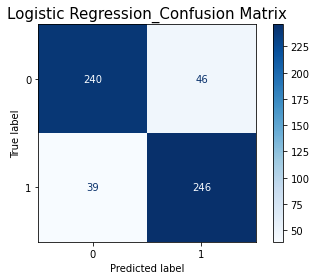

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [60]:
print(cm)

[[240  46]
 [ 39 246]]


# K-Neighbors - Confusion Matrix

In [61]:
KN_CM = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
KN_CM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Text(0.5, 1.0, 'KNeighbors_Confusion Matrix')

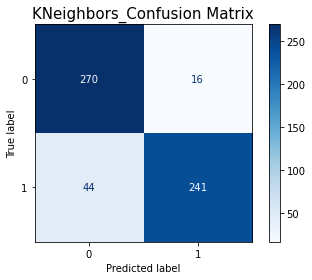

In [62]:

y_pred = KN_CM.predict(X_test)
KCM = confusion_matrix(y_test, y_pred)

kcm_display = ConfusionMatrixDisplay(KCM).plot(cmap="Blues")
plt.title("KNeighbors_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [63]:
print(cm)

[[240  46]
 [ 39 246]]


# Decision Tree - Confusion Matrix

In [64]:
DT_CM = make_pipeline(StandardScaler(), DecisionTreeClassifier(splitter='best'))
DT_CM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Text(0.5, 1.0, 'Decision Tree_Confusion Matrix')

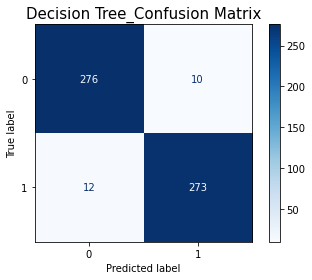

In [65]:
y_pred = DT_CM.predict(X_test)
DTCM = confusion_matrix(y_test, y_pred)

dtcm_display = ConfusionMatrixDisplay(DTCM).plot(cmap="Blues")
plt.title("Decision Tree_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [66]:
print(cm)

[[240  46]
 [ 39 246]]


# Random Forest - Confusion Matrix

In [67]:
RF_CM = make_pipeline(StandardScaler(), RandomForestClassifier(max_features='auto'))
RF_CM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

Text(0.5, 1.0, 'Random Forest_Confusion Matrix')

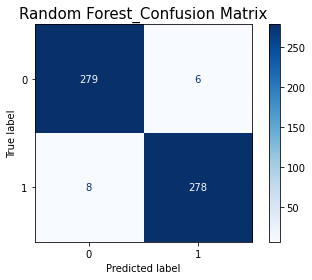

In [71]:

y_pred = RF_CM.predict(X_test)
RFCM = confusion_matrix(y_test, y_pred)

rfcm_display = ConfusionMatrixDisplay(RFCM).plot(cmap="Blues")
plt.title("Random Forest_Confusion Matrix", fontsize= 15) #specification for Plot Title

In [72]:
print(cm)

[[236  49]
 [ 29 257]]


# FROM THE ANALYSIS, RANDOM FOREST CLASSIFIER SHOULD BE DEPLOY SINCE IT HAS THE HIGHEST ACCURACY. 